Iteration    0: Cost 0.7419752870600826   
Iteration 1000: Cost 0.6440420378447345   
Iteration 2000: Cost 0.644241213376196   
Iteration 3000: Cost 0.6443066441257479   
Iteration 4000: Cost 0.644338165680519   
Iteration 5000: Cost 0.6443560897308809   
Iteration 6000: Cost 0.6443672552077945   
Iteration 7000: Cost 0.6443747552587191   
Iteration 8000: Cost 0.6443801401029265   
Iteration 9000: Cost 0.6443842202526724   

updated parameters: w:[-3.11964965e-04 -7.04971611e-05  2.05690768e-05 -2.64673647e-05
 -1.14975139e-04  2.79345101e-03  1.49268357e-04  5.25940962e-04
  5.76568259e-04  1.04930146e-04  6.97029434e-06 -2.12154905e-04
  1.31106451e-05  1.09466862e-03  5.43685577e-04 -2.65906715e-03
 -1.15037114e-03 -3.56732701e-04 -2.58657118e-03], b:5.318729297550884e-05


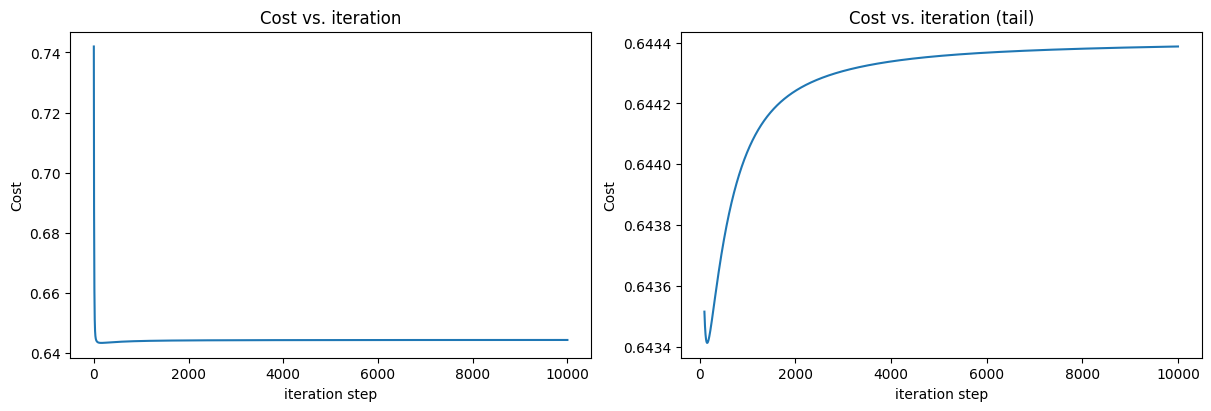

prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 1, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
predicti

In [ ]:
import os
import pandas as pd

import copy, math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('binary_classification_train.csv')


X_train = df.iloc[1:5000,1:-2]
y_train = df.iloc[1:5000,-1]

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = sigmoid(np.dot(X,w) + b)
    cost = np.array(-y*np.log(z) - (1-y)*np.log(1-z))

    cost = cost / m
    return cost.sum()

def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

w_tmp  = np.zeros(X_train.shape[1])
b_tmp  = 0.
alph = 10**(-5)
iters = 10000

w_out, b_out, J_hist= gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

y_pred = []
for i in range(X_train.shape[0]):
    if (sigmoid(np.dot(X_train.iloc[i], w_out) + b_out) >= 0.6):
        y_pred.append(1)
    else:
        y_pred.append(0)


for i in range(len(y_pred)):
    print(f"prediction: {y_pred[i]}, target value: {y_train.iloc[i]}")

In [ ]:
#To Check if Logistic Regression is Working Well

#ACCURACY
y_CV= df.iloc[5000:-1,-1]

y_predCV = []
for i in range(y_CV.shape[0]):
    if (sigmoid(np.dot(X_train.iloc[i], w_out) + b_out) >= 0.61):
        y_predCV.append(1)
    else:
        y_predCV.append(0)

count = 0

for i in range(y_CV.shape[0]):
  if(y_predCV[i]- y_train.iloc[i] == 1 or y_predCV[i]- y_train.iloc[i] == -1):
    count += 1
accuracy = (1-(count/y_CV.shape[0]))*100
print(f"Accuracy: {accuracy:0.3f} %     misclassified examples: {count}      Total examples: {y_CV.shape[0]}")


Accuracy: 92.919 %     misclassified examples: 65      Total examples: 918


In [ ]:
# CALCULATING THE F1 SCORE OF MODEL

# CALCULATING TRUE POSITIVES[TP], TRUE NEGATIVE[TN] , FALSE PSITIVE[FP], FALSE NEGative[FN]

def TP(y_pred,y_train):
  TP=0
  for i in range(len(y_pred)):
    if(y_pred[i] == 1 and y_train.iloc[i] == 1):
      TP += 1
  return TP

def TN(y_pred,y_train):
  TN=0
  for i in range(len(y_pred)):
    if(y_pred[i] == 0 and y_train.iloc[i] == 0):
      TN += 1
  return TN

def FP(y_pred,y_train):
  FP=0
  for i in range(len(y_pred)):
    if(y_pred[i] == 1 and y_train.iloc[i] == 0):
      FP += 1
  return FP

def FN(y_pred,y_train):
  FN=0
  for i in range(len(y_pred)):
    if(y_pred[i] == 0 and y_train.iloc[i] == 1):
      FN += 1
  return FN


def F1_score(y_pred,y_train):
  precision = TP(y_pred,y_train)/(TP(y_pred,y_train)+FP(y_pred,y_train))
  recall = TP(y_pred,y_train)/(TP(y_pred,y_train)+FN(y_pred,y_train))
  F1 = 2*(precision*recall)/(precision+recall)
  return F1

F1_score1 = F1_score(y_pred,y_train)
print(f"f1 score of the given model: {F1_score1}")

f1 score of the given model: 0.8874172185430462


In [ ]:
# Test set prediction

df1 = pd.read_excel('binary_classification_test.xlsx')
X_test = df1.iloc[1:,1:-1]
y_pred_test = []

y_pred_test = []
for i in range(y_CV.shape[0]):
    if (sigmoid(np.dot(X_test.iloc[i], w_out) + b_out) >= 0.61):
        y_pred_test.append(1)
    else:
        y_pred_test.append(0)

print(y_pred_test)


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 